# 3. Descrição das atividades 
Implementar três classificadores de dígitos contidos no dataset MNIST, utilizando os três 
modelos lineares de Aprendizagem de Máquina (AM) estudados: Perceptron, Regressão 
Linear e Regressão Logística. Detalhes da implementação estão descritas a seguir.

## 3.1. Redução da dimensão das amostras 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
import sklearn
import random

In [2]:
def read_instance(filepath):
    data = pd.read_csv(filepath)
    return(data)

### Intensidade

In [3]:
def intensidade(data):
    intensidade = []
    data = np.array(data)
    for i in range(len(data)):
        intensidade.append(sum(data[i])/255)#somatorio da linha divido por 255
    return intensidade

### Simetria

In [4]:
#mudança pra velocidade foi apenas fazer com np array
def simetria(data):
    list_simetria = []
    data = np.array(data)
    for k in range(len(data)):#pular linha
        soma_line_horizontal = 0
        soma_line_vertical = 0
        tamanho = len(data[k])
        
        for i in range(28):#vertical
            for j in range(14):#entre pixels das metades  
                img_inicial = data[k][28*i+j]
                img_final = data[k][28*i+(27-j)]
                soma_line_vertical += abs(img_inicial - img_final)
        
        for i in range(tamanho-1,int(tamanho/2),-1):#horizontal do fim até a metade iterando com -1
            img_inicial = data[k][i]
            img_final = data[k][abs(i-tamanho)]
            soma_line_horizontal += abs(img_inicial - img_final)
            
        soma = (soma_line_vertical+soma_line_horizontal)/2
        list_simetria.append(soma/255)
    
    return list_simetria

### Train_redu.csv Teste_redu.csv

In [5]:
def reduced(filepath):#reduzir um arquivo usando simetria e intensidade
    data =  read_instance(filepath)
    label = data['label']
    data = data.drop(columns=['Unnamed: 0'])
    data = data.drop(columns=['label'])
    intensidade_data = intensidade(data)
    simetria_data = simetria(data)
    redu_data = pd.DataFrame({'Label':label,'intensidade': intensidade_data,'simetria': simetria_data})
    return redu_data

In [15]:
#recebe arquivo csv reduz e tranforma em csv novamente 
train = reduced("train.csv")
train.to_csv("train_redu.csv")
test = reduced("test.csv")
test.to_csv("test_redu.csv")


In [16]:
train_redu = read_instance("train_redu.csv")
train_redu = train_redu.drop(columns=["Unnamed: 0"])

In [17]:
test_redu = read_instance("test_redu.csv")
test_redu = test_redu.drop(columns=["Unnamed: 0"])

>Realizar um filtro nos dados dos arquivos train_redu.csv e test_redu.csv, deixando apenas as imagens com valores 1 ou 5 na coluna label, construindo as instâncias  train1x5 e test1x5;

## Classificação dos dígitos 1 x 5 

### Realizar um filtro 1x5

In [162]:
values = [1,5]

In [163]:
train1x5 = train_redu[train_redu.Label.isin(values)]
test1x5 = test_redu[test_redu.Label.isin(values)]

In [164]:
x_train, y_train = train1x5.drop(columns=['Label']) , train1x5['Label']
y_train = y_train.values.reshape(-1,1)
x_train = np.column_stack((np.ones((x_train.shape[0],1)),x_train,))

In [165]:
x_test, y_test = test1x5.drop(columns=['Label']), test1x5['Label']
y_test = y_test.values.reshape(-1,1)
x_test = np.column_stack((np.ones((x_test.shape[0],1)),x_test))

### Plotar os dados de train1x5

In [166]:
def plot1x5(x,y):
    
    plt.scatter(x.values[:,1], x.values[:,2], color='red',marker='o',label = 5)
    plt.scatter(y.values[:,1], y.values[:,2], color='blue',marker='o',label = 1)
    plt.xlabel('intensidade')
    plt.ylabel('simetria')
    plt.legend(loc='upper left')
    plt.show()

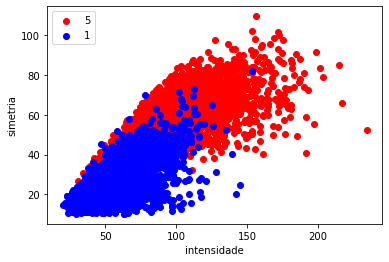

In [167]:
cinco = [5]
um = [1]
trainx5 = train_redu[train_redu.Label.isin(cinco)]
#testx5 = test_redu[test_redu.Label.isin(cinco)]
trainx1 = train_redu[train_redu.Label.isin(um)]
#testx1 = test_redu[test_redu.Label.isin(um)]
plot1x5(trainx5,trainx1)

# Começo da atualização

## Perceptron 

In [181]:
class perceptron:
    def __init__(self, n_iter):
        self.n_iter = n_iter
    
    def predict(self, x):
       
        net = np.dot(x, self.w_[1:] + self.w_[0])
        return np.where(net>=0.0, 5, 1)

    
    def fit(self, x, y):
        self.w_ = np.zeros(1+x.shape[1])
        self.errors_ = []
    
    
        
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            
    def get_w_(self):
        return self.w_
    
    

In [182]:
ppn = perceptron( n_iter = 10)

In [183]:
ppn.fit(x_train,y_train)

In [184]:
y_pred = ppn.predict(x_test)

In [185]:
mc = confusion_matrix(y_test, y_pred)
print('consufion matrix\n',mc,'\n---------------------------------------------------------------')
print('classification report\n',sklearn.metrics.classification_report(y_test,y_pred))

consufion matrix
 [[1179  349]
 [  49 1275]] 
---------------------------------------------------------------
classification report
               precision    recall  f1-score   support

           1       0.96      0.77      0.86      1528
           5       0.79      0.96      0.86      1324

    accuracy                           0.86      2852
   macro avg       0.87      0.87      0.86      2852
weighted avg       0.88      0.86      0.86      2852



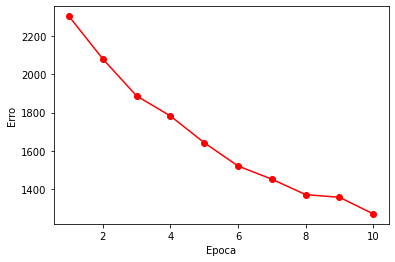

In [186]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_, marker = 'o', color='red')
plt.xlabel('Epoca')
plt.ylabel('Erro')
plt.show()

In [187]:
data = pd.DataFrame(np.column_stack((x_test,y_pred)), columns=['x0','x1','x2','class'])

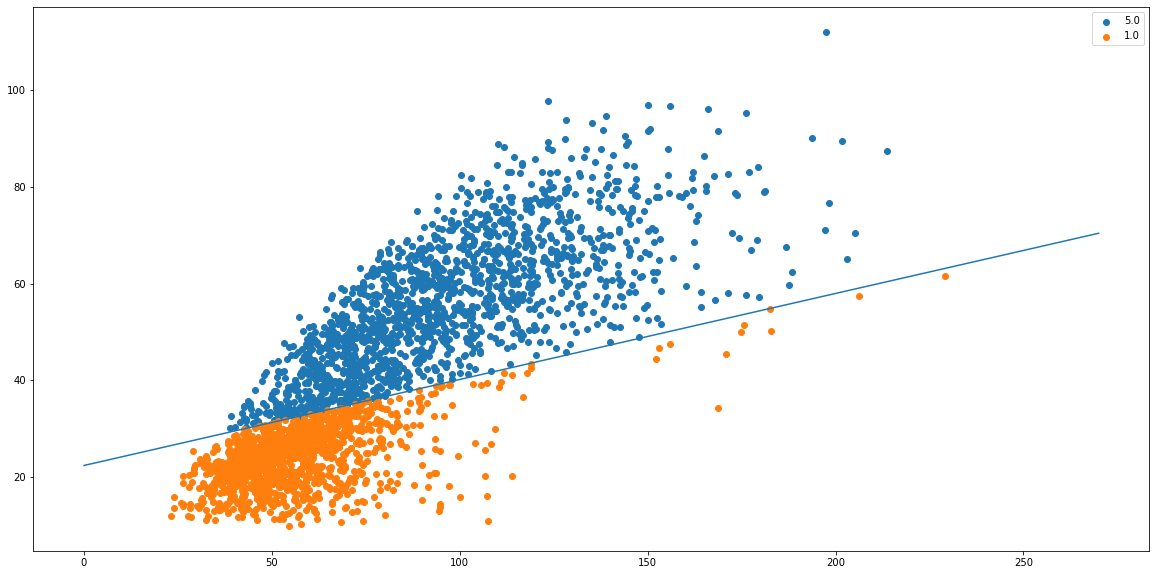

In [188]:
classes = data['class'].unique()
w = ppn.w_[1:] + ppn.w_[0]
figure = plt.figure(figsize=(20,10))
axis = figure.add_subplot(111)

for classe in classes:
    valores =  data[data['class'] == classe].values
    y = valores[:,1]
    z = valores[:,2]
    axis.scatter(y,z, label=classe)

x_new = np.linspace(0,270,1000)

plt.plot(x_new, (-w[0] - w[1]*x_new)/w[2])
    
axis.legend()


## Regressão Linear

In [190]:
class LinearRegression_2:#correta
    def fit(self, x_train, y_train):
        x = np.array(list(map(lambda i: [1, i[1], i[2]], x_train)))


        x =  np.array(x)
        y =  np.array(y_train)
        xTx = np.dot(x.transpose(), x)
        inverse = np.linalg.inv(xTx)
        self.w = np.dot(np.dot( inverse, x.transpose()), y)

    def predict(self, x_test):

        x = np.array(list(map(lambda i: [1, i[1], i[2]], x_test)))

        return np.sign([np.dot(xn,self.w) for xn in x])

    def get_w(self):
        return self.w

In [191]:
def value_changer(y_train):
    new_y_train = np.where(y_train == 1,1,-1)
    return new_y_train.reshape(-1,1)

In [192]:
new_y_train = value_changer(y_train)# trocando os numeros por menos -1 e 1
lr = LinearRegression_2()

In [193]:
lr.fit(x_train,new_y_train)
y_pred_lr = lr.predict(x_test)

In [194]:
mc = confusion_matrix(value_changer(y_test), y_pred_lr.ravel())
display(mc)

array([[1155,  169],
       [  92, 1436]], dtype=int64)

In [195]:
print(sklearn.metrics.classification_report(value_changer(y_test),y_pred_lr))

              precision    recall  f1-score   support

          -1       0.93      0.87      0.90      1324
           1       0.89      0.94      0.92      1528

    accuracy                           0.91      2852
   macro avg       0.91      0.91      0.91      2852
weighted avg       0.91      0.91      0.91      2852



In [196]:
data = pd.DataFrame(np.column_stack((x_test,y_pred_lr)), columns=['x0','x1','x2','class'])

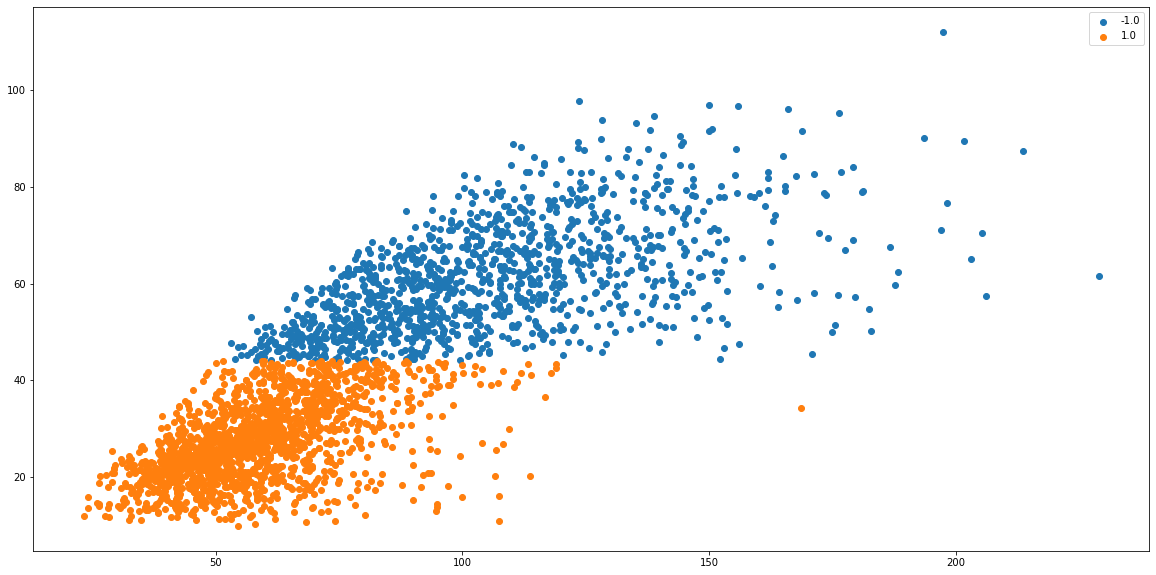

In [197]:
classes = data['class'].unique()

figure = plt.figure(figsize=(20,10))
axis = figure.add_subplot(111)

for classe in classes:
    valores =  data[data['class'] == classe].values
    y = valores[:,1]
    z = valores[:,2]
    axis.scatter(y,z, label=classe)
    
axis.legend()

## OVR sem sklearning

In [198]:
#criando x_train y_train x_test y_test para ovr
values_ovr = [1,4,8]
train_ovr = train_redu[train_redu.Label.isin(values_ovr)]
test_ovr = test_redu[test_redu.Label.isin(values_ovr)]

x_train_ovr, y_train_ovr = test_ovr.drop(columns=['Label']) , train_ovr['Label']
y_train_ovr = y_train_ovr.values.reshape(-1,1)
x_train_ovr = np.column_stack((np.ones((x_train_ovr.shape[0],1)),x_train_ovr))

x_test_ovr, y_test_ovr = test_ovr.drop(columns=['Label']), test_ovr['Label']
y_test_ovr = y_test_ovr.values.reshape(-1,1)
x_test_ovr = np.column_stack((np.ones((x_test_ovr.shape[0],1)),x_test_ovr))



In [199]:
train_ovr

,Label,intensidade,simetria
0,1,65.290196,33.627451
1,1,52.647059,10.517647
6,8,167.054902,87.572549
8,1,48.411765,18.380392
20,1,46.854902,27.227451
...,...,...,...
27756,4,71.894118,47.815686
27759,8,83.835294,63.105882
27767,1,84.964706,22.294118
27768,4,125.752941,75.819608


### 1 vs rest

In [203]:
y_test_ovr.ravel()

array([4, 1, 8, ..., 8, 4, 4], dtype=int64)

In [204]:
y_train_ovr_1 = np.where(y_test_ovr.ravel()== 1,1,-1)
y_test_ovr_1 = np.where(y_test_ovr.ravel()== 1,1,-1)

In [205]:
ppn = perceptron( n_iter = 10)

In [206]:
ppn.fit(x_train_ovr,y_train_ovr_1)

In [207]:
y_pred_ovr = ppn.predict(x_test_ovr)

In [208]:
mc = confusion_matrix(y_test_ovr, y_pred_ovr)
print('consufion matrix\n',mc,'\n---------------------------------------------------------------')
print('classification report\n',sklearn.metrics.classification_report(y_test_ovr,y_pred_ovr,zero_division= 1) )

consufion matrix
 [[1528    0    0]
 [1392    0    0]
 [1373    0    0]] 
---------------------------------------------------------------
classification report
               precision    recall  f1-score   support

           1       0.36      1.00      0.52      1528
           4       1.00      0.00      0.00      1392
           8       1.00      0.00      0.00      1373

    accuracy                           0.36      4293
   macro avg       0.79      0.33      0.17      4293
weighted avg       0.77      0.36      0.19      4293



In [209]:
data = pd.DataFrame(np.column_stack((x_test_ovr,y_pred_ovr)), columns=['x0','x1','x2','class'])

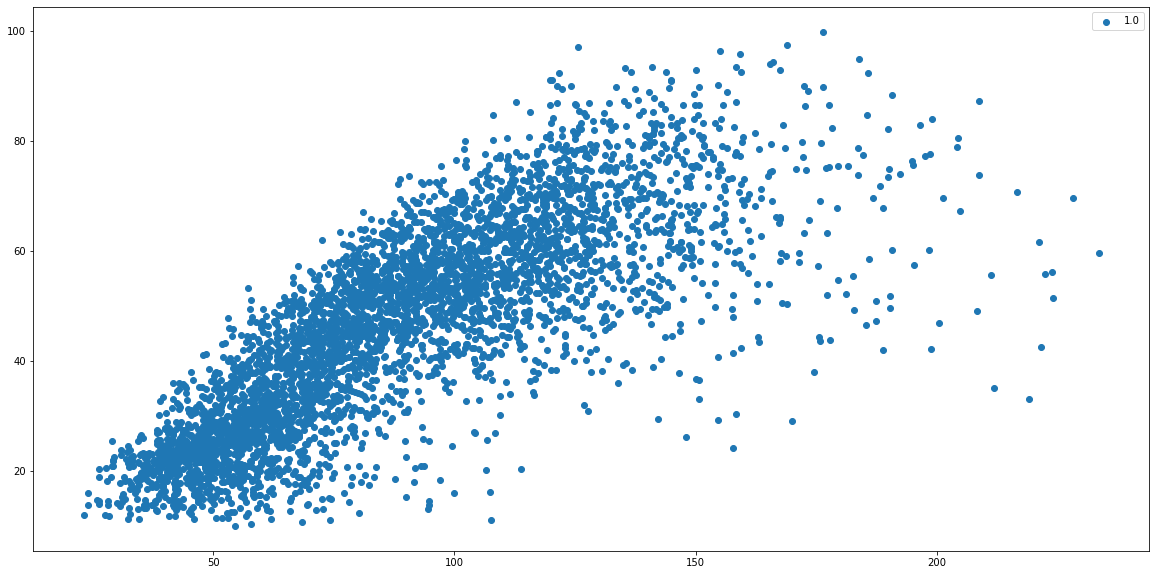

In [210]:
classes = data['class'].unique()

figure = plt.figure(figsize=(20,10))
axis = figure.add_subplot(111)

for classe in classes:
    valores =  data[data['class'] == classe].values
    y = valores[:,1]
    z = valores[:,2]
    axis.scatter(y,z, label=classe)
    
axis.legend()

# fim da atualização

In [27]:
pla = Perceptron(tol=0.1,max_iter=100)

Atribuir o valor alvo 
𝑦 = +1 para a imagem com valor 𝑙𝑎𝑏𝑒𝑙 = 1 e 𝑦 = −1 para 𝑙𝑎𝑏𝑒𝑙 = 5; 

In [28]:
y_train = np.where(train1x5['Label']== 1,1,-1)
y_test = np.where(test1x5['Label']== 1,1,-1)
pla.fit(x_train, y_train.ravel())# x= caracteristicas(simetria,intensidade) y = label

Perceptron(max_iter=100, tol=0.1)

Criar um método de predição do dígito que retorne o valor 1 quando o 
classificador linear classificar a saída como 𝑦 = +1 e retorne o valor 5 quando 𝑦 =
−1;

In [29]:
def pre1x5(x):
    if (pla.predict([x]) == -1):
        return int(5)
    elif(pla.predict([x]) == 1):
        return int(1)

In [30]:
pre1x5(x_train[1]) == y_train[1]

True

# Sklearning

## Perceptron

In [31]:
pla = Perceptron(tol=0.1,max_iter=100)
pla.fit(x_train, y_train)#x_train e y_test aqui ainda é 1x5
y_predtest_pla = pla.predict(x_test)

### Matriz de confusão e relatório de eficácia Perceptron

In [32]:
y_predtest_pla = pla.predict(x_test)
mc = confusion_matrix(y_test, y_predtest_pla)
display(mc)

array([[1305,   19],
       [ 391, 1137]], dtype=int64)

In [33]:
print(sklearn.metrics.classification_report(y_test,y_predtest_pla))

              precision    recall  f1-score   support

          -1       0.77      0.99      0.86      1324
           1       0.98      0.74      0.85      1528

    accuracy                           0.86      2852
   macro avg       0.88      0.86      0.86      2852
weighted avg       0.88      0.86      0.86      2852



## Linear regression sklearning


In [34]:
lr2 = LinearRegression()
lr2.fit(x_train, y_train)



LinearRegression()

### Matriz de confusão e relatório de eficácia Regressão linear

In [35]:
y_predtest_linear = np.sign(lr2.predict(x_test))
confusion_matrix(y_test,y_predtest_linear)

array([[1155,  169],
       [  92, 1436]], dtype=int64)

In [36]:
print(sklearn.metrics.classification_report(y_test,y_predtest_linear))

              precision    recall  f1-score   support

          -1       0.93      0.87      0.90      1324
           1       0.89      0.94      0.92      1528

    accuracy                           0.91      2852
   macro avg       0.91      0.91      0.91      2852
weighted avg       0.91      0.91      0.91      2852



## Logistic Regression

In [37]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

### Matriz de confusão e relatório de eficácia Regressão logistica

In [38]:
y_predtest_logistic = lg.predict(x_test)
confusion_matrix(y_test,y_predtest_logistic)

array([[1190,  134],
       [ 118, 1410]], dtype=int64)

In [39]:
print(sklearn.metrics.classification_report(y_test,y_predtest_logistic))

              precision    recall  f1-score   support

          -1       0.91      0.90      0.90      1324
           1       0.91      0.92      0.92      1528

    accuracy                           0.91      2852
   macro avg       0.91      0.91      0.91      2852
weighted avg       0.91      0.91      0.91      2852



## 3.3. Classificador de dígitos completo 


In [40]:
x_train, y_train = train_redu.drop(columns=['Label']), train_redu['Label']
x_test, y_test = test_redu.drop(columns=['Label']), test_redu['Label']

### Logistic Regression 'One-vs-Rest'

In [41]:
ovr_logistic = LogisticRegression(multi_class='ovr')
ovr_logistic.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [42]:
y_pred_logistic = ovr_logistic.predict(x_test)
score_ovr_logistic = ovr_logistic.score(x_test,y_test)

In [43]:
acuracia_ovr_logistic= sklearn.metrics.accuracy_score(y_test,y_pred_logistic)
#precisao_ovr_logistic=sklearn.metrics.precision_score(y_test,y_pred_logistic)
#recall_ovr_logistic=sklearn.metrics.recall_score(y_test,y_pred_logistic)
#f1_ovr_logistic=sklearn.metrics.f1_score(y_test,y_pred_logistic)

In [44]:
confusion_matrix(y_test,y_pred_logistic)

array([[ 685,   58,  257,   38,    0,    0,    0,  155,  114,   79],
       [   5, 1392,    1,    2,    0,    0,    0,   48,   12,   68],
       [ 331,   53,  347,   52,    0,    0,    0,  425,   63,  105],
       [ 341,   59,  301,   99,    0,    0,    0,  445,   86,  194],
       [ 136,  175,  132,   64,    0,    0,    0,  514,   84,  287],
       [ 207,  104,  169,   53,    0,    0,    0,  554,   70,  167],
       [ 282,   81,  242,   80,    0,    0,    0,  414,   83,  238],
       [  53,  100,  169,   48,    0,    0,    0, 1029,   16,  105],
       [ 416,  113,  240,   59,    0,    0,    0,  236,  132,  177],
       [ 161,  159,  129,   61,    0,    0,    0,  423,  112,  338]],
      dtype=int64)

In [45]:
acuracia_ovr_logistic

0.28270190482884655

In [46]:
#como diferenciar falso positivos de negativo em uma matriz 10x10?

### Linear Regression 'One-vs-Rest'

In [47]:
linear_model = LinearRegression()
ovr_linear = OneVsRestClassifier(linear_model)
ovr_linear.fit(x_train,y_train)

OneVsRestClassifier(estimator=LinearRegression())

In [48]:
y_pred_linear = ovr_linear.predict(x_test)
confusion_matrix(y_test,y_pred_linear)

array([[ 794,  241,  181,    0,    0,    0,    0,  170,    0,    0],
       [   8, 1508,    2,    0,    0,    0,    0,   10,    0,    0],
       [ 452,  272,  246,    0,    0,    0,    0,  406,    0,    0],
       [ 493,  393,  206,    0,    0,    0,    0,  433,    0,    0],
       [ 225,  673,   96,    0,    0,    0,    0,  398,    0,    0],
       [ 294,  448,  127,    0,    0,    0,    0,  455,    0,    0],
       [ 430,  441,  172,    0,    0,    0,    0,  377,    0,    0],
       [ 102,  468,  129,    0,    0,    0,    0,  821,    0,    0],
       [ 540,  429,  167,    0,    0,    0,    0,  237,    0,    0],
       [ 263,  728,   92,    0,    0,    0,    0,  300,    0,    0]],
      dtype=int64)

In [49]:
ovr_linear.score(x_test,y_test)

0.23680326140437197

### Perceptron 'One-vs-Rest'

In [50]:
pla_model = Perceptron()
ovr_pla = OneVsRestClassifier(pla_model)
ovr_pla.fit(x_train,y_train)

OneVsRestClassifier(estimator=Perceptron())

In [51]:
y_pred_pla = ovr_pla.predict(x_test)
confusion_matrix(y_test,y_pred_pla)

array([[   0,   84,    0,    0,    0,  225,    0,    0, 1077,    0],
       [   0, 1478,    0,    0,    0,   15,    0,    0,   35,    0],
       [   0,  162,    0,    0,    0,  478,    0,    0,  736,    0],
       [   0,  248,    0,    0,    0,  439,    0,    0,  838,    0],
       [   0,  482,    0,    0,    0,  421,    0,    0,  489,    0],
       [   0,  301,    0,    0,    0,  505,    0,    0,  518,    0],
       [   0,  292,    0,    0,    0,  406,    0,    0,  722,    0],
       [   0,  378,    0,    0,    0,  887,    0,    0,  255,    0],
       [   0,  209,    0,    0,    0,  264,    0,    0,  900,    0],
       [   0,  501,    0,    0,    0,  315,    0,    0,  567,    0]],
      dtype=int64)

In [52]:
ovr_pla.score(x_test,y_test)

0.20264286216349195